In [3]:
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest)
library(dplyr)# rvest makes scraping easier
library(visdat)

In [4]:
imdb_20000_data <- read_csv("IMDB_20000_MOVIES.csv")

Parsed with column specification:
cols(
  Index = col_number(),
  Movie_names = col_character(),
  Year = col_character(),
  Advisory_rating = col_character(),
  runtime = col_character(),
  genre = col_character(),
  Ratings = col_double(),
  Description = col_character(),
  Director = col_character(),
  Cast = col_character(),
  User_votes = col_number()
)



In [5]:
imdb_data  <- imdb_20000_data
head(imdb_data,5)

Index,Movie_names,Year,Advisory_rating,runtime,genre,Ratings,Description,Director,Cast,User_votes
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,Enola Holmes,-2020,PG-13,123 min,"Adventure, Crime, Drama",6.6,"When Enola Holmes-Sherlock's teen sister-discovers her mother missing, she sets off to find her, becoming a super-sleuth in her own right as she outwits her famous brother and unravels a dangerous conspiracy around a mysterious young Lord.",Harry Bradbeer,Millie Bobby Brown,75468
2,The Devil All the Time,-2020,R,138 min,"Crime, Drama, Thriller",7.1,Sinister characters converge around a young man devoted to protecting those he loves in a postwar backwoods town teeming with corruption and brutality.,Antonio Campos,Donald Ray Pollock,56302
3,Tenet,-2020,PG-13,150 min,"Action, Sci-Fi",7.8,"Armed with only one word, Tenet, and fighting for the survival of the entire world, a Protagonist journeys through a twilight world of international espionage on a mission that will unfold in something beyond real time.",Christopher Nolan,John David Washington,130255
4,The Boys in the Band,-2020,R,121 min,Drama,6.8,"At a birthday party in 1968 New York, a surprise guest and a drunken game leave seven gay friends reckoning with unspoken feelings and buried truths.",Joe Mantello,Jim Parsons,5665
5,The Trial of the Chicago 7,-2020,R,129 min,"Drama, History, Thriller",7.6,"The story of 7 people on trial stemming from various charges surrounding the uprising at the 1968 Democratic National Convention in Chicago, Illinois.",Aaron Sorkin,Eddie Redmayne,979


In [6]:
imdb_data$Year <-  as.numeric(gsub("-","", imdb_data$Year))
imdb_data$genre  <- str_extract(imdb_data$genre, '\\w*')
imdb_data$runtime  <- as.numeric(gsub("min","",imdb_data$runtime))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [7]:
count(imdb_data)

n
<int>
20000


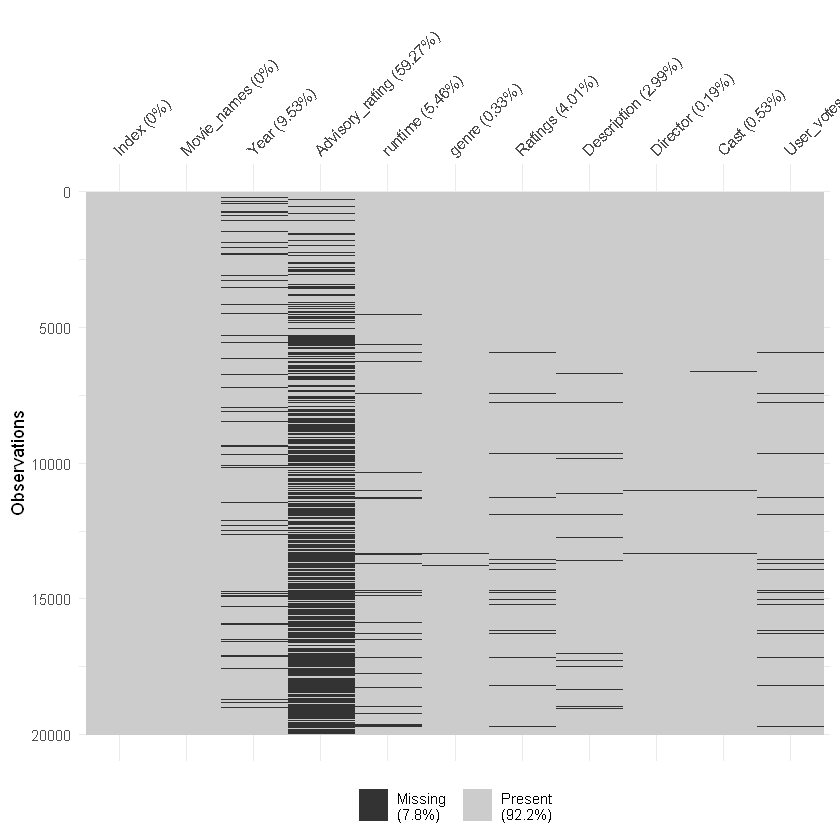

In [8]:
imdb_data %>%
vis_miss()

In [17]:
apply(imdb_data, 2, function(x) any(is.na(x) | is.infinite(x)))

Index     Movie_names            Year Advisory_rating         runtime 
          FALSE           FALSE            TRUE            TRUE            TRUE 
          genre         Ratings     Description        Director            Cast 
           TRUE            TRUE            TRUE            TRUE            TRUE 
     User_votes 
           TRUE

In [15]:
head(imdb_data,50)

Index,Movie_names,Year,Advisory_rating,runtime,genre,Ratings,Description,Director,Cast,User_votes
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,Enola Holmes,2020,PG-13,123,Adventure,6.6,"When Enola Holmes-Sherlock's teen sister-discovers her mother missing, she sets off to find her, becoming a super-sleuth in her own right as she outwits her famous brother and unravels a dangerous conspiracy around a mysterious young Lord.",Harry Bradbeer,Millie Bobby Brown,75468
2,The Devil All the Time,2020,R,138,Crime,7.1,Sinister characters converge around a young man devoted to protecting those he loves in a postwar backwoods town teeming with corruption and brutality.,Antonio Campos,Donald Ray Pollock,56302
3,Tenet,2020,PG-13,150,Action,7.8,"Armed with only one word, Tenet, and fighting for the survival of the entire world, a Protagonist journeys through a twilight world of international espionage on a mission that will unfold in something beyond real time.",Christopher Nolan,John David Washington,130255
4,The Boys in the Band,2020,R,121,Drama,6.8,"At a birthday party in 1968 New York, a surprise guest and a drunken game leave seven gay friends reckoning with unspoken feelings and buried truths.",Joe Mantello,Jim Parsons,5665
5,The Trial of the Chicago 7,2020,R,129,Drama,7.6,"The story of 7 people on trial stemming from various charges surrounding the uprising at the 1968 Democratic National Convention in Chicago, Illinois.",Aaron Sorkin,Eddie Redmayne,979
6,After We Collided,2020,R,105,Drama,5.3,"Based on the 2014 romance novel of the same name, this follows the love life of two young adults.",Roger Kumble,Josephine Langford,5104
7,Secret Society of Second Born Royals,2020,TV-PG,99,Action,4.6,It follows Sam's adventures at a top-secret training program for a new class of second-born royals tasked with saving the world.,Anna Mastro,Peyton Elizabeth Lee,1782
8,Mulan,2020,PG-13,115,Action,5.4,A young Chinese maiden disguises herself as a male warrior in order to save her father.,Niki Caro,Yifei Liu,61080
9,I'm Thinking of Ending Things,2020,R,134,Drama,6.7,"Full of misgivings, a young woman travels with her new boyfriend to his parents' secluded farm. Upon arriving, she comes to question everything she thought she knew about him, and herself.",Charlie Kaufman,Jesse Plemons,41548


In [ ]:
imdb_data

In [82]:
imdb_data <- na.omit(imdb_data)

In [83]:
count(imdb_data)

n
<int>
7192


In [84]:
head(v,3)

Index,Movie_names,Year,Advisory_rating,runtime,genre,Ratings,Description,Director,Cast,User_votes
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,Enola Holmes,2020,PG-13,123,Adventure,6.6,"When Enola Holmes-Sherlock's teen sister-discovers her mother missing, she sets off to find her, becoming a super-sleuth in her own right as she outwits her famous brother and unravels a dangerous conspiracy around a mysterious young Lord.",Harry Bradbeer,Millie Bobby Brown,75468
2,The Devil All the Time,2020,R,138,Crime,7.1,Sinister characters converge around a young man devoted to protecting those he loves in a postwar backwoods town teeming with corruption and brutality.,Antonio Campos,Donald Ray Pollock,56302
3,Tenet,2020,PG-13,150,Action,7.8,"Armed with only one word, Tenet, and fighting for the survival of the entire world, a Protagonist journeys through a twilight world of international espionage on a mission that will unfold in something beyond real time.",Christopher Nolan,John David Washington,130255


In [86]:
#Stroing data into CSV file
getwd()  # getting current working directory
filepath <- paste(getwd(),'//imdb_data_softscraped_8000.csv',sep='')  # creating file path using 'paste' function with seprator a whitespace
write.csv(imdb_data,filepath, row.names = TRUE)
#library(tidytext)

[1] "C:/Users/64223/Jupyter C/Data Wrangling Lab/Group Project"